In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [9]:
options=ticker.option_chain(ticker.options[1]).calls
options[(options['strike']<200)&(options['strike']>100)]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,AMZN251114C00120000,2025-11-03 14:45:49+00:00,120.0,137.24,134.05,135.35,30.140007,28.141932,6,1,2.247075,True,REGULAR,USD
1,AMZN251114C00125000,2025-11-03 16:58:12+00:00,125.0,130.81,129.10,130.35,9.059998,7.441476,17,5,2.149419,True,REGULAR,USD
2,AMZN251114C00130000,2025-11-03 17:44:19+00:00,130.0,127.17,124.10,125.35,40.629997,46.949383,1,6,2.042974,True,REGULAR,USD
3,AMZN251114C00135000,2025-11-03 18:29:16+00:00,135.0,121.60,119.10,120.35,26.099998,27.329840,2,39,1.940430,True,REGULAR,USD
4,AMZN251114C00140000,2025-11-03 19:01:13+00:00,140.0,116.32,114.10,114.35,40.739998,53.903145,60,2,1.539065,True,REGULAR,USD
5,AMZN251114C00145000,2025-11-03 16:58:12+00:00,145.0,110.82,109.10,109.35,10.720001,10.709292,12,2,1.457034,True,REGULAR,USD
6,AMZN251114C00150000,2025-11-03 14:30:24+00:00,150.0,105.76,103.10,105.40,8.220001,8.427313,1,5,1.397464,True,REGULAR,USD
7,AMZN251114C00155000,2025-10-30 14:37:27+00:00,155.0,72.20,99.15,99.35,0.000000,0.000000,3,4,1.318363,True,REGULAR,USD
8,AMZN251114C00160000,2025-11-03 19:01:13+00:00,160.0,96.34,94.15,95.40,7.539993,8.490983,55,3,1.493167,True,REGULAR,USD
9,AMZN251114C00165000,2025-10-31 17:43:35+00:00,165.0,81.85,89.15,89.40,0.000000,0.000000,4,66,1.185551,True,REGULAR,USD


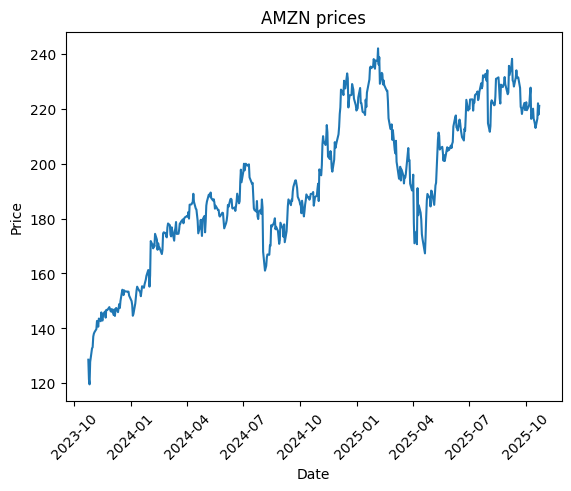

In [ ]:
plt.plot(prices)
plt.title(f"{ticker.ticker} prices")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

In [ ]:
ticker=yf.Ticker('AMZN')
expiry=ticker.options[1]
print(f"Ticker: {ticker.ticker}")
print(f"Expiry: {expiry}")
options=ticker.option_chain(expiry).calls
prices=ticker.history(period="2y")['Close']
last_price=prices.iloc[-1]
print(f"Last price: {last_price}")
margin=3
options=options[(options['strike']>=last_price-margin)&(options['strike']<=last_price+margin)]
options

Ticker: AMZN
Expiry: 2025-10-31
Last price: 221.08999633789062


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
26,AMZN251031C00220000,2025-10-23 19:59:57+00:00,220.0,8.41,8.4,8.55,0.91,12.133331,8234,13542,0.608036,True,REGULAR,USD
27,AMZN251031C00222500,2025-10-23 19:59:57+00:00,222.5,7.25,7.2,7.30,0.85,13.281249,2730,5698,0.605961,False,REGULAR,USD


In [ ]:
from scipy.optimize import brentq


S0 = last_price
mu = prices.pct_change().mean()
t = (dt.datetime.strptime(expiry, "%Y-%m-%d") - dt.datetime.today()).days + 1
r = (1+0.071)**(1/255)-1
print(f"S_0:{S_0}")
print(f"mu:{mu}")
print(f"dt:{t}")
print(f"Expiry:{expiry}")
for K, l in zip(options['strike'], options['lastPrice']):
    def BS(sigma):
        d1 = (np.log(S0/K) + (r + sigma**2/2)*t) / (sigma*np.sqrt(t))
        d2 = d1 - sigma*np.sqrt(t)
        c = S0*stats.norm.cdf(d1) - K*np.exp(-r*t)*stats.norm.cdf(d2)
        return c

    def objective(sigma):
        return BS(sigma) - l

    implied_vol = brentq(objective, -0.01, 0.07, xtol=1e-6)

    print(f"La volatilidad implícita para strike en {K} es: {implied_vol:.6f}")

S_0:0.001272381910189032
mu:0.001272381910189032
dt:7
Expiry:2025-10-31
La volatilidad implícita para strike en 220.0 es: 0.032837
La volatilidad implícita para strike en 222.5 es: 0.033085


**Vencimiento**

In [13]:
prices = yf.download("AMZN", start="2025-10-24", end="2025-11-01")["Close"]

/tmp/ipython-input-2137701493.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download("AMZN", start="2025-10-24", end="2025-11-01")["Close"]
[*********************100%***********************]  1 of 1 completed


In [16]:
#Retornos logarítmicos
returns = np.log(prices / prices.shift(1)).dropna()

#Volatilidad realizada anualizada
realized_vol = float(np.sqrt(np.sum(returns**2) * (252 / len(returns))))

print(f"Volatilidad realizada anualizada: {realized_vol:.6f}")

Volatilidad realizada anualizada: 0.700130


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipython-input-2238672557.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  realized_vol = float(np.sqrt(np.sum(returns**2) * (252 / len(returns))))


**Conclusiones**

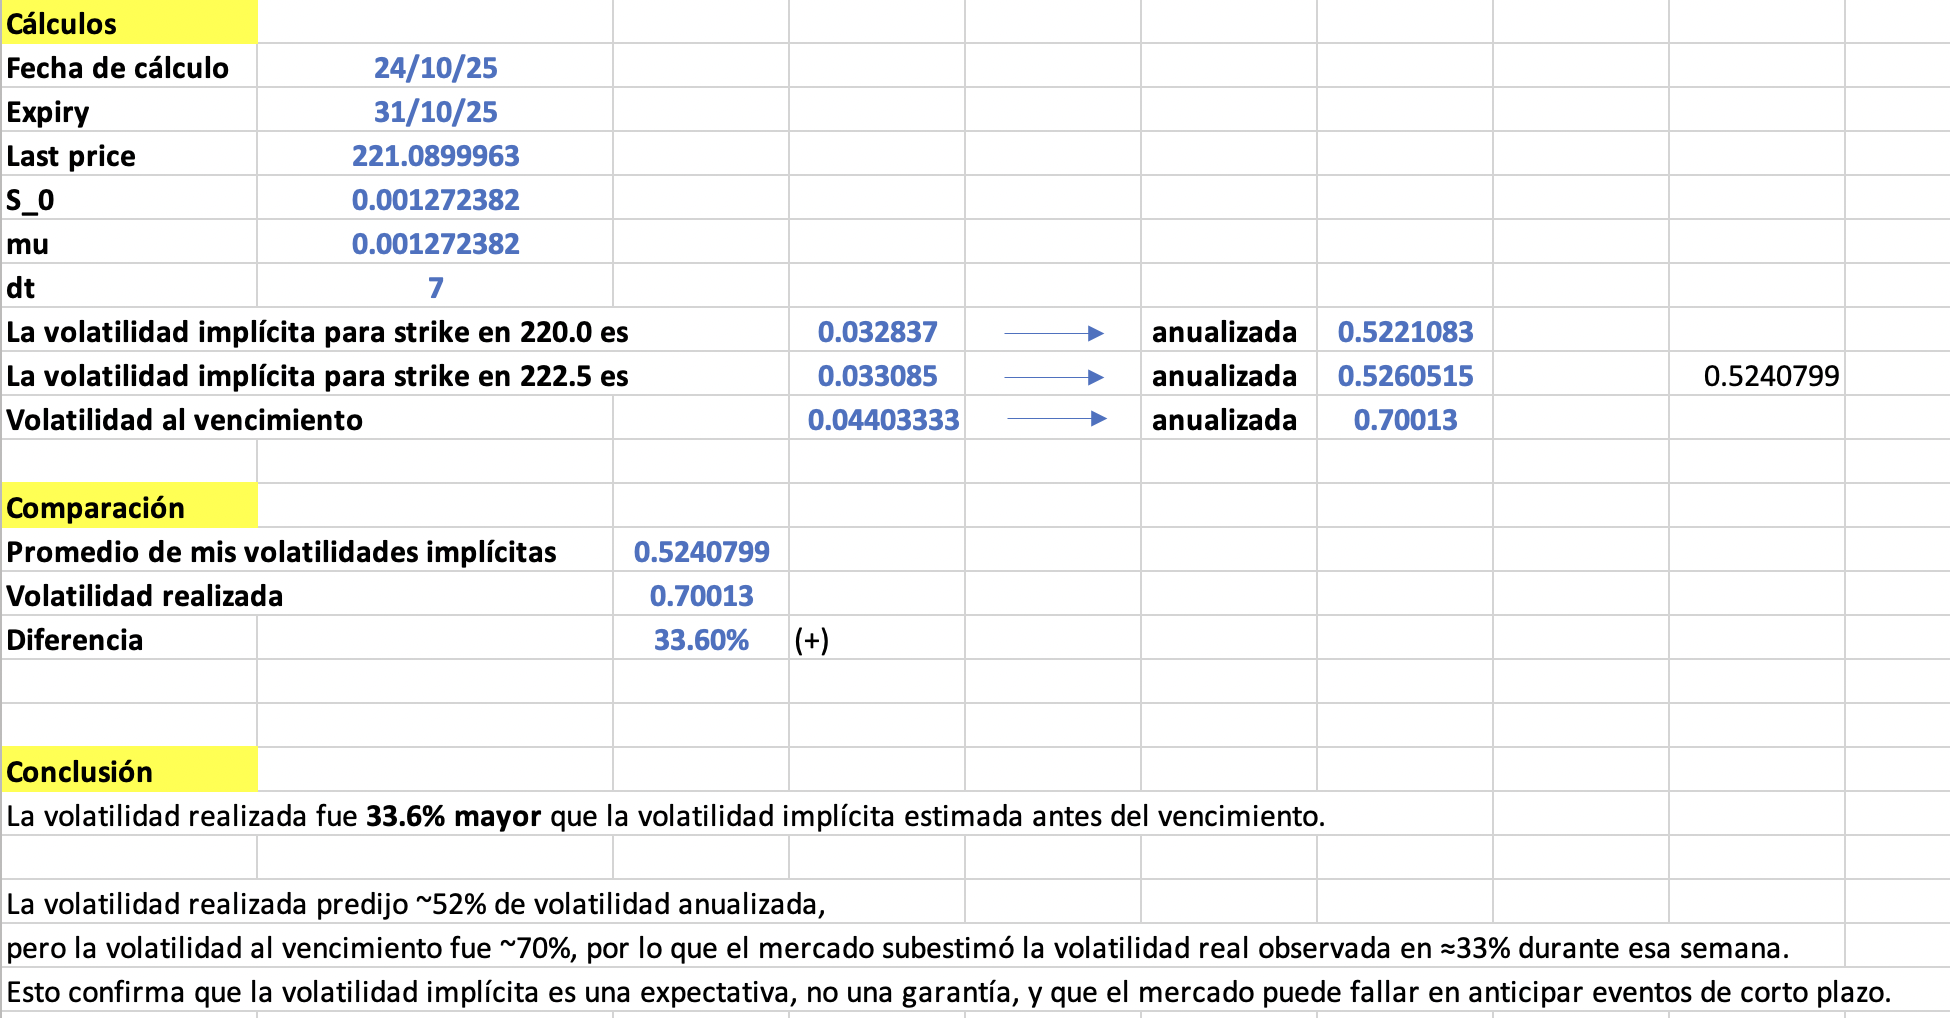

In [17]:
from IPython.display import Image
Image('Conclusion.png')